## Links
https://scikit-learn.org/stable/modules/preprocessing.html

https://minerandodados.com.br/analise-de-dados-com-python-usando-pandas/
<p>http://primo-pmtna01.hosted.exlibrisgroup.com/primo_library/libweb/action/dlDisplay.do?vid=PUC01&search_scope=PUC01&docId=sfx4340000000024805&fn=permalink                                                                       </p>


<h2>Como ler dados de um arquivo .csv em um notebook Jupyter</h2>

<p>Trabalhar com arquivos de dados em formato .csv em um notebook Jupyter é muito fácil. Na verdade, é fácil em qualquer programa Python. Isto graças a biblioteca de análise de dados **pandas**. **pandas** (isto não é um erro de português, ela é escrita assim mesmo, sempre em minúsculas) é uma bliblioteca que permite a leitura e a manipulação de dados em formato tabular. Para utilizá-la, precisamos primeiro carregar a biblioteca com o seguinte código:</p>

<b>"Os dados referem-se ao consumo de combustível do ciclo da cidade em milhas por galão,
    a ser previsto em termos de 3 discretos multivalorados e 5 contínuos
    atributos. "</b>

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('C:/Users/Alberto Pinalli/Documents/GitHub/SGBD/auto-mpg.csv')


# Data Cleaning 
Tratando Missing Values

Se você observar o nosso conjunto de dados vai ver que na coluna ‘Cabin’ temos alguns valores preenchidos com NaN(Not a Number), um dos motivos é que talvez o passageiro não tenha de fato uma cabine ou essa informação simplesmente não foi coletada. Esse problema é muito comum e deve ser tratado, já que os modelos de Machine Learning não são capazes de lidar com valores ausentes.
Podemos visualizar esses valores com o método <b>isnull().sum()</b>, que retorna a soma dos valores nulos encontrados por coluna.
Como já foi dito esses dados ausentes precisam ser tratados, mais como isso deve ser feito?

Temos algumas alternativas como excluir esses dados ou preencher esses valores com a média ou com a moda por exemplo, na existe uma receita de bolo para o tratamento desses valores, e você deve testar e escolher aquela que melhor se adequar ao seu problema.

Vamos preencher os valores faltantes da coluna ‘Age’ e da coluna ‘Embarked’ com a moda (valor que mais se repete em cada uma dessas colunas). Para coluna ‘Cabin’, vamos substituir todos os valores faltantes pela sigla SC (Sem Cabine).
    values = {'Age': df.Age.mode()[0], 'Cabin': 'SC', 'Embarked': df.Embarked.mode()[0]}

In [4]:
values = {'horsepower': df.horsepower.mode()[0]}

In [5]:
values

{'horsepower': 150.0}

In [6]:
df.fillna(value=values, inplace=True)

In [7]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

<h3>Listando as primeiras linhas</h3>

In [8]:
df.head(5)
#    cilindros deslocamento  cavalos  peso  aceleração modelo/ano origen   nomeCarro

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


<h2>Análise Exploratória de Dados</h2>
<h3>Análise básica do conteúdo</h3>

In [9]:
# df.info()
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

<h3>Listando o conteúdo de uma coluna específica em uma linha específica:</h3>
<p>Neste caso a coluna cnt na linha número 1, que é a segunda linha.</p>

In [10]:
df['car name'][2]
# [COLUMN]   [INDEX]

'plymouth satellite'

## Percentual

In [11]:
print('Percentual: ', df['mpg'][1]/df['displacement'][1])

Percentual:  0.04285714285714286


<h3>Procurando por linhas que atendem a uma condição</h3>
<p>Este seria o equivalente a usar o WHERE do SQL.</p>

In [12]:
df['car name'] == 'amc rebel sst'

0      False
1      False
2      False
3       True
4      False
       ...  
393    False
394    False
395    False
396    False
397    False
Name: car name, Length: 398, dtype: bool

In [91]:
df[df['weight'] > 2890 ] # select * from df where weightt=1349

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
366,17.6,6,225.0,85.0,3465,16.6,81,1,chrysler lebaron salon
374,23.0,4,151.0,150.0,3035,20.5,82,1,amc concord dl
386,25.0,6,181.0,110.0,2945,16.4,82,1,buick century limited
387,38.0,6,262.0,85.0,3015,17.0,82,1,oldsmobile cutlass ciera (diesel)


<h3>Calculando e imprimindo algumas medidas estatísticas básicas sobre uma coluna específica</h3>

In [49]:
print('Média de cnt......: ',df['weight'].mean())
print('Menor valor de cnt: ', df['weight'].min())
print('Maior valor de cnt: ', df['weight'].max())

Média de cnt......:  2970.424623115578
Menor valor de cnt:  1613
Maior valor de cnt:  5140


<h3>Calculando e imprimindo medidas estatísticas sobre todas as colunas numéricas</h3>

In [13]:
df.describe()
# std = desvio padrão

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,105.155779,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.600986,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,95.000000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,130.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


<h3>Calculando e imprimindo histogramas sobre todas as colunas numéricas</h3>

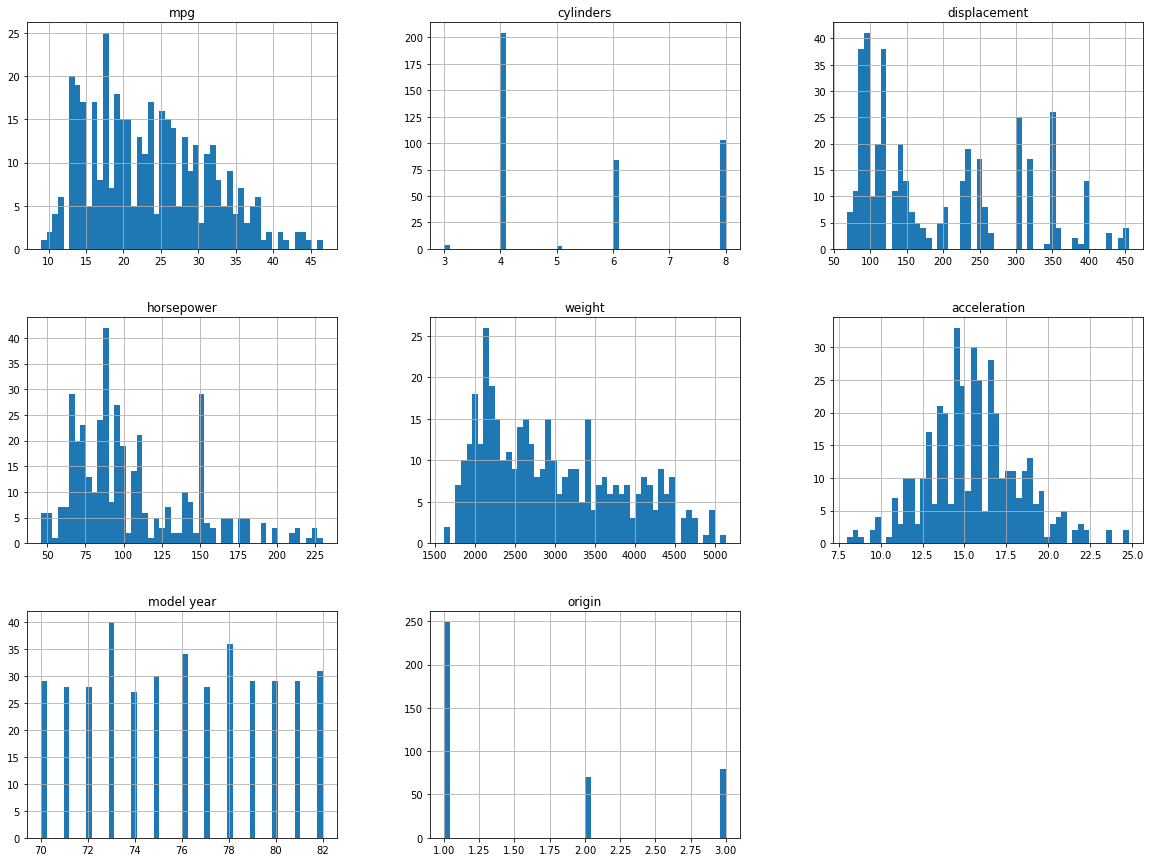

In [14]:
#%  matplotlib inline # only in a Jupyter notebook
import matplotlib.pyplot as plt

df.hist(bins = 50, figsize = (20,15))
plt.show()

<h3>Gerando gráficos diversos</h3>

<p><font color=red><b>Atenção:</b></font> <b>Jamais analisar a coluna alvo durante a análise exploratória.</b> Fazer isto poderia induzir o analista/pesquisador a tomar decisões específicas mais a frente baseadas nestas descovertas em detrimento de outras decisões igualmente válidas, introduzindo assim um viés indesejado na análise/pesquisa.</p>
<p><b>Exemplo de análise que não deve ser feita:</b></p>

In [ ]:
# df.plot(x='dteday', y='cnt')
# plt.show()

## Analisando correlações entre colunas numéricas
### Gráficos de dispersão comparando todas as colunas entre si

In [16]:
feature_names = ['mpg','cylinders','displacement','horsepower','weight',
                'acceleration']
#,'model year','origin','car name'

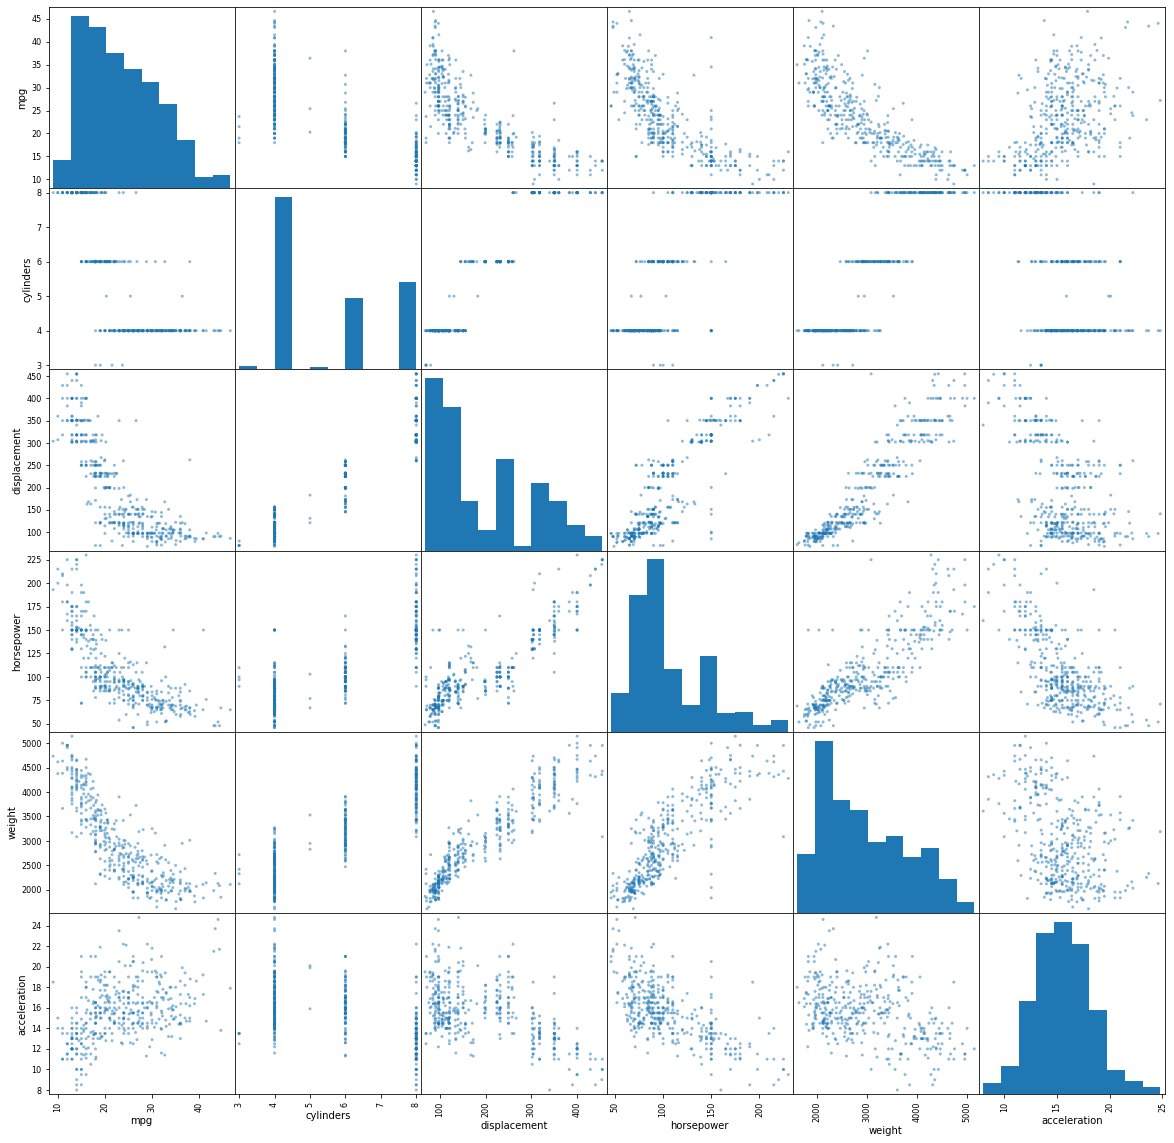

In [17]:
pd.plotting.scatter_matrix(df[feature_names],figsize=(20, 20)) # scatter_matriz = matriz de dispersão
plt.show()

### Analisando pares de colunas com correlações interessantes
### Correlação entre <i>horsepower</i> e <i>weight</i>

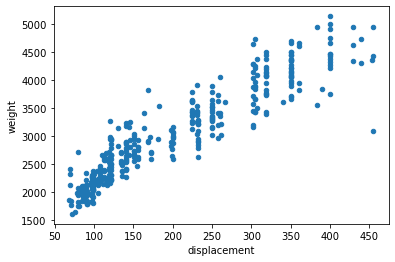

In [105]:
df.plot(x ='displacement', y ='weight' , kind ='scatter')
plt.show()

In [107]:
df[['displacement','weight']]

,displacement,weight
0,307.0,3504
1,350.0,3693
2,318.0,3436
3,304.0,3433
4,302.0,3449
...,...,...
393,140.0,2790
394,97.0,2130
395,135.0,2295
396,120.0,2625


## Correlação de Pearson

In [153]:
# SCIPY == PACOTE DE ESTATISTICA

import scipy.stats as stats

r, p = stats.pearsonr(df['displacement'].values, df['weight'].values)
r

0.932824146841635

### Automatizando um pouco a análise para conjuntos grandes de colunas

#### Escolhendo as colunas preditivas númericas que serão analisadas

In [117]:
# COLUNAS NUMERICAS
num_feature_names = ['mpg','cylinders','displacement','horsepower','weight',
                'acceleration','model year','origin']

#### Calculando uma matríz de correlações entre as colunas preditivas numéricas escolhidas

In [118]:
import numpy as np

# corrcoef == CALCULA O COEFICIENTE DE CORRELAÇÃO ENTRE TODAS AS COLUNAS DE UM DATAFRAME
# rowvar=False == VARIAVEIS ESTÃO NAS COLUNAS  rowvar=true == VARIAVEIS ESTÃO NAS LINHAS
corr = np.corrcoef(df[num_feature_names],rowvar=False)
corr

# e-04 == 4 CASAS ABAXIO DE ZERO

# COORELAÇÃO = 1, PODE APAGAR 
# NÃO APAGAR MAIOR 0.9 OU -0.9



array([[ 1.        , -0.77539629, -0.80420282, -0.75317698, -0.83174093,
         0.42028891,  0.57926713,  0.56345036],
       [-0.77539629,  1.        ,  0.95072139,  0.81845415,  0.8960168 ,
        -0.50541949, -0.3487458 , -0.56254335],
       [-0.80420282,  0.95072139,  1.        ,  0.87332968,  0.93282415,
        -0.54368408, -0.37016416, -0.6094094 ],
       [-0.75317698,  0.81845415,  0.87332968,  1.        ,  0.84177   ,
        -0.66583336, -0.39777244, -0.45427088],
       [-0.83174093,  0.8960168 ,  0.93282415,  0.84177   ,  1.        ,
        -0.41745732, -0.30656433, -0.58102391],
       [ 0.42028891, -0.50541949, -0.54368408, -0.66583336, -0.41745732,
         1.        ,  0.28813695,  0.20587301],
       [ 0.57926713, -0.3487458 , -0.37016416, -0.39777244, -0.30656433,
         0.28813695,  1.        ,  0.1806622 ],
       [ 0.56345036, -0.56254335, -0.6094094 , -0.45427088, -0.58102391,
         0.20587301,  0.1806622 ,  1.        ]])

### Criando um <i>dataframe pandas</i> para facilitar a visualização da matríz de correlações

In [119]:
dfcorr = pd.DataFrame(corr,index = num_feature_names, columns = num_feature_names)
dfcorr

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
mpg,1.000000,-0.775396,-0.804203,-0.753177,-0.831741,0.420289,0.579267,0.563450
cylinders,-0.775396,1.000000,0.950721,0.818454,0.896017,-0.505419,-0.348746,-0.562543
displacement,-0.804203,0.950721,1.000000,0.873330,0.932824,-0.543684,-0.370164,-0.609409
horsepower,-0.753177,0.818454,0.873330,1.000000,0.841770,-0.665833,-0.397772,-0.454271
weight,-0.831741,0.896017,0.932824,0.841770,1.000000,-0.417457,-0.306564,-0.581024
acceleration,0.420289,-0.505419,-0.543684,-0.665833,-0.417457,1.000000,0.288137,0.205873
model year,0.579267,-0.348746,-0.370164,-0.397772,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.454271,-0.581024,0.205873,0.180662,1.000000


### Exportando a matríz de correlações para um arquivo <i>.csv</i> visando análise no Excel

In [120]:
# df.index
#df.columns
# df.values
# df.loc[1]
# df.select_dtypes(include = ['float'])
# df.isnull().sum()
dfcorr.to_csv('correlCar.csv',sep=';',decimal=',')

# Pré-processamento

## Separando um conjunto de dados para teste

In [122]:
from sklearn.model_selection import train_test_split
# train_test_split = quebrar em teste

In [123]:
df_treino, df_teste = train_test_split(df, test_size = 0.2, random_state = 42)
# test_size = 0.2 = 20% das linhas reservado para o conjunto de testes
# random_state = 42 (randomico 42 semente)

### Separando o atributo alvo dos atributos preditivos

In [124]:
df_treino_labels = df_treino['mpg'].copy()
df_treino        = df_treino.drop(columns='mpg')

In [126]:
 df_treino.head()
# df_treino_labels.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
3,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
18,4,97.0,88.0,2130,14.5,70,3,datsun pl510
376,4,91.0,68.0,2025,18.2,82,3,mazda glc custom l
248,4,91.0,60.0,1800,16.4,78,3,honda civic cvcc
177,4,115.0,95.0,2694,15.0,75,2,audi 100ls


In [128]:
# COLUNAS QUE SERÃO DESCARTADAS

df_treino = df_treino.drop(columns=['car name','origin','model year'])
df_teste  = df_teste.drop( columns=['car name','origin','model year'])

In [129]:
df_treino

,cylinders,displacement,horsepower,weight,acceleration
3,8,304.0,150.0,3433,12.0
18,4,97.0,88.0,2130,14.5
376,4,91.0,68.0,2025,18.2
248,4,91.0,60.0,1800,16.4
177,4,115.0,95.0,2694,15.0
...,...,...,...,...,...
71,3,70.0,97.0,2330,13.5
106,8,350.0,180.0,4499,12.5
270,4,134.0,95.0,2515,14.8
348,4,89.0,62.0,2050,17.3


In [130]:
df_treino

,cylinders,displacement,horsepower,weight,acceleration
3,8,304.0,150.0,3433,12.0
18,4,97.0,88.0,2130,14.5
376,4,91.0,68.0,2025,18.2
248,4,91.0,60.0,1800,16.4
177,4,115.0,95.0,2694,15.0
...,...,...,...,...,...
71,3,70.0,97.0,2330,13.5
106,8,350.0,180.0,4499,12.5
270,4,134.0,95.0,2515,14.8
348,4,89.0,62.0,2050,17.3


In [136]:
nomes_atributos_numericos = ['displacement', 'horsepower', 'weight']
nomes_atributos           = nomes_atributos_numericos

In [137]:
from sklearn.preprocessing import StandardScaler

In [138]:
scaler = StandardScaler()
scaler.fit(df_treino[nomes_atributos_numericos])

StandardScaler()

### MÉDIA PADRÃO DE CADA COLUNA

In [139]:
scaler.mean_

array([ 191.90408805,  104.01886792, 2969.01572327])

### DESVIO PADRÃO DE CADA COLUNA

In [140]:
scaler.scale_

array([102.82175033,  37.46049856, 839.29496266])